# Wall Crack Segmentation CNN Model 〰

## About Data
* Provided with images and their related masks


### Libraries and Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array


### Data Visulization 👁️

In [2]:
## Base Directories for the Images
image_dir = "data/images"

mask_dir = 'data/masks'


In [3]:
## Total No of images we have 
print("Total Images -->",len(os.listdir(image_dir)))
print('Total Masks -->',len(os.listdir(mask_dir)))

Total Images --> 441
Total Masks --> 441


Following function is checking if an image has co-responding mask or not

In [4]:
def check_image_mask_pairs(image_folder, mask_folder):
    image_files = set(os.listdir(image_folder))
    mask_files = set(os.listdir(mask_folder))
    
    missing_masks = image_files - mask_files
    missing_images = mask_files - image_files
    if not missing_masks and not missing_images:
        print("All images have corresponding masks.")
    else:
        print(" no")

check_image_mask_pairs(image_dir,mask_dir)

All images have corresponding masks.


Vizulizing some images and Mask

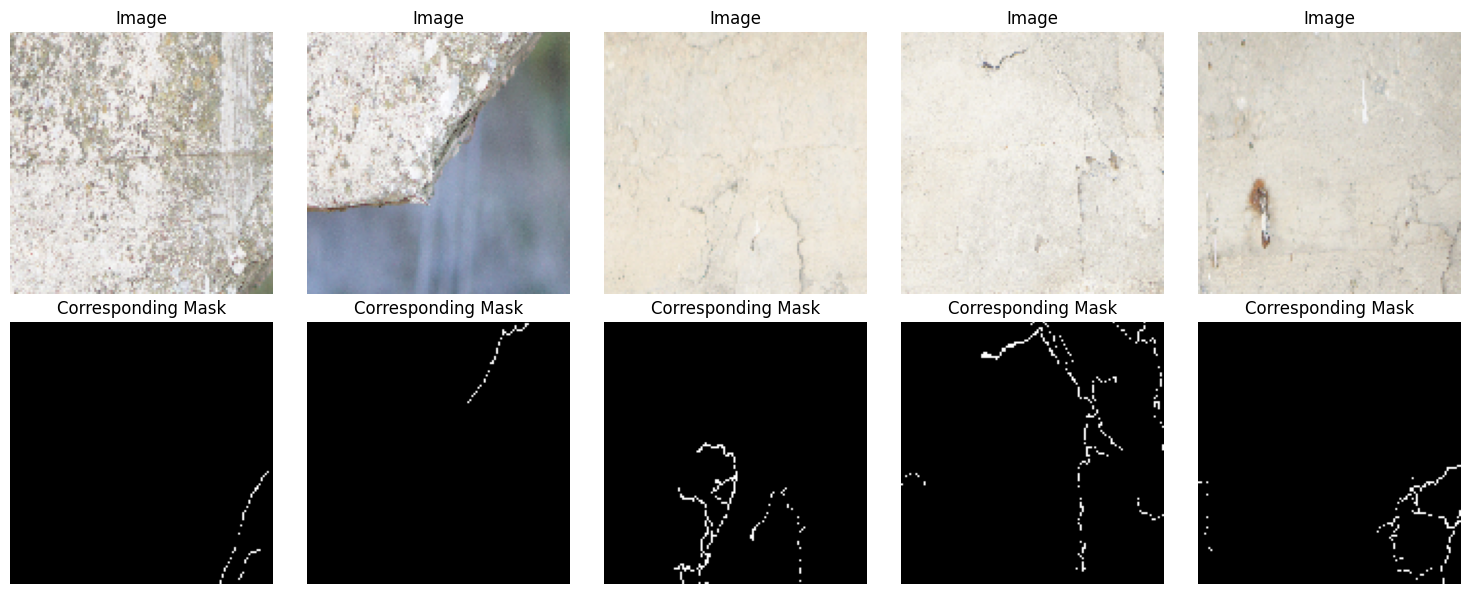

In [5]:
# Constants for image_width and image height
IMG_WIDTH = 128
IMG_HEIGHT = 128


## function to read and plot 5 images and their corresponding masks to get
# an idea
def read_and_plot_images(image_dir, mask_dir, num_images=5):

    img_names1 = os.listdir(image_dir)[:num_images]
    img_names2 = os.listdir(mask_dir)[:num_images]

    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))

    for i, img_name in enumerate(img_names1):
        img = load_img(os.path.join(image_dir, img_name), target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img) / 255.0
        axes[0, i].imshow(img_array)
        axes[0, i].set_title(f"Image")
        axes[0, i].axis('off')

    for i, img_name in enumerate(img_names2):
        img = load_img(os.path.join(mask_dir, img_name), target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img) / 255.0
        axes[1, i].imshow(img_array)
        axes[1, i].set_title(f"Corresponding Mask")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
read_and_plot_images(image_dir, mask_dir)


## Data Pre-Processing  🛠️

### Function to load and -pre-process the images and masks
#### Steps
* Load each image
* Re-Shape them to 256 256 by 3 for images and 256 256 by 1 for mask according to the paper
* Convert them into array
* Normalize them into 0's and 1's

In [26]:

def load_images_and_masks(image_dir,mask_dir):
    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))

    images = np.zeros((len(image_files), 128, 128, 3), dtype=np.float32)
    masks = np.zeros((len(mask_files), 128, 128, 1), dtype=np.float32)
    
    for i, img_name in enumerate(image_files):
        img = load_img(os.path.join(image_dir, img_name), target_size=(IMG_HEIGHT, IMG_WIDTH))
        images[i] = img_to_array(img) / 255.0
    
    for i, mask_name in enumerate(mask_files):
        mask = load_img(os.path.join(mask_dir, mask_name), color_mode="grayscale", target_size=(IMG_HEIGHT, IMG_WIDTH))
        masks[i] = img_to_array(mask) / 255.0
    
    return images,masks



### Loading the data 🕵🏻‍♂️

In [27]:
images , masks = load_images_and_masks(image_dir,mask_dir)

In [ ]:
print('lenght of the images-->',len(images))

lenght of the images--> 441


Printing first image in the form of array

In [28]:
print(images[0])
print('Image Shape after Conversion-->',images[0].shape)

[[[0.8901961  0.92156863 0.92941177]
  [0.84313726 0.85490197 0.81960785]
  [0.81960785 0.8235294  0.7607843 ]
  ...
  [0.77254903 0.77254903 0.8039216 ]
  [0.65882355 0.6666667  0.62352943]
  [0.7372549  0.7058824  0.6627451 ]]

 [[0.8039216  0.74509805 0.6627451 ]
  [0.7411765  0.6784314  0.6156863 ]
  [0.9137255  0.9137255  0.90588236]
  ...
  [0.7058824  0.7176471  0.7529412 ]
  [0.80784315 0.78039217 0.75686276]
  [0.78431374 0.76862746 0.73333335]]

 [[0.63529414 0.6156863  0.5294118 ]
  [0.72156864 0.7019608  0.6784314 ]
  [0.7529412  0.74509805 0.7490196 ]
  ...
  [0.80784315 0.8235294  0.827451  ]
  [0.83137256 0.83137256 0.8       ]
  [0.8392157  0.8039216  0.78431374]]

 ...

 [[0.9529412  0.9411765  0.92156863]
  [0.93333334 0.92156863 0.9019608 ]
  [0.85490197 0.84705883 0.8666667 ]
  ...
  [0.45490196 0.4745098  0.3882353 ]
  [0.46666667 0.49019608 0.3882353 ]
  [0.45490196 0.49019608 0.38431373]]

 [[0.94509804 0.93333334 0.9137255 ]
  [0.93333334 0.91764706 0.9137255 ]


Printing mask array of first image

In [29]:
print(masks[0])
print(masks[0].shape)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
(128, 128, 1)


## Splitting the data into Training and Validation Part

10% for Validaiton means 45 images will be for validation <br>
90 % for Training measn 396 images for training 

In [11]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test ,y_train , y_test = train_test_split(images, masks,test_size=0.1,random_state=42)


In [31]:
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

396 396
45 45


## Building the Model 🔨
For model we are going to use U-Net for segmentation 

In [32]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Conv2DTranspose,concatenate,Dense,Flatten
import tensorflow as tf
from tensorflow.keras.models import Model

In [34]:
def u_netmodel(input_shape):
    # Define the input layer with the given shape
    inputs = tf.keras.layers.Input(input_shape)


    # Down-Sampling the image
    # Block 1: Input -> Conv2D -> Conv2D -> MaxPooling2
    c1 = Conv2D(64,(3,3),activation = 'relu',padding = 'same')(inputs)
    c1 = Conv2D(64,(3,3),activation = 'relu',padding = 'same')(c1)
    p1 = MaxPooling2D((2,2))(c1)

    # Block 2: Conv2D -> Conv2D -> MaxPooling2D
    c2 = Conv2D(128,(3,3),activation = 'relu',padding = 'same')(p1)
    c2 = Conv2D(128,(3,3),activation = 'relu',padding = 'same')(c2)
    p2 = MaxPooling2D((2,2))(c2)
    
    #     Block 3: Conv2D -> Conv2D -> MaxPooling2D
    c3 = Conv2D(256,(3,3),activation = 'relu',padding = 'same')(p2)
    c3 = Conv2D(256,(3,3),activation = 'relu',padding = 'same')(c3)
    p3 = MaxPooling2D((2,2))(c3)

    # Block 4: Conv2D -> Conv2D -> MaxPooling2D
    c4 = Conv2D(512,(3,3),activation = 'relu',padding = 'same')(p3)
    c4 = Conv2D(512,(3,3),activation = 'relu',padding = 'same')(c4)
    p4 = MaxPooling2D((2,2))(c4)
    
    # Bottleneck: Conv2D -> Conv2D
    c5 = Conv2D(1024,(3,3),activation = 'relu',padding = 'same')(p4)
    c5 = Conv2D(1024,(3,3),activation = 'relu',padding = 'same')(c5)

    ## Up-Sampling the image for constructing the mask image
    # Block 1: Conv2DTranspose -> concatenate -> Conv2D -> Conv2D
    
    u6 = Conv2DTranspose(512,(2,2),strides=(2,2),padding='same')(c5)
    u6 = concatenate([u6,c4])
    
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

        
    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    
    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model



In [35]:
model = u_net_model((128,128,3))


### Compiling the Model 🖥️


In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [37]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_19[0][0]']              
                                )                                                           

### Training the Model 🚀
Fitting the model with training data <br>
Epoch 180
Batch Size 32 means 32 images at the time will be used

In [38]:
history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    epochs=180,
                    batch_size = 32)

Epoch 1/180
13/13 [==============================] - 5s 288ms/step - loss: 0.1893 - accuracy: 0.9907 - val_loss: 0.0733 - val_accuracy: 0.9903
Epoch 2/180
13/13 [==============================] - 4s 272ms/step - loss: 0.0614 - accuracy: 0.9913 - val_loss: 0.0604 - val_accuracy: 0.9903
Epoch 3/180
13/13 [==============================] - 4s 271ms/step - loss: 0.0559 - accuracy: 0.9913 - val_loss: 0.0558 - val_accuracy: 0.9903
Epoch 4/180
13/13 [==============================] - 4s 272ms/step - loss: 0.0511 - accuracy: 0.9913 - val_loss: 0.0541 - val_accuracy: 0.9903
Epoch 5/180
13/13 [==============================] - 4s 272ms/step - loss: 0.0494 - accuracy: 0.9913 - val_loss: 0.0532 - val_accuracy: 0.9903
Epoch 6/180
13/13 [==============================] - 4s 272ms/step - loss: 0.0490 - accuracy: 0.9913 - val_loss: 0.0544 - val_accuracy: 0.9903
Epoch 7/180
13/13 [==============================] - 4s 273ms/step - loss: 0.0495 - accuracy: 0.9913 - val_loss: 0.0519 - val_accuracy: 0.9903

In [40]:

print(f"Validation Loss: {history.history['loss']}")

Validation Loss: [0.18926793336868286, 0.06136368215084076, 0.05586487427353859, 0.051087308675050735, 0.04941466450691223, 0.04895715042948723, 0.049455054104328156, 0.047724783420562744, 0.04684136062860489, 0.0452205091714859, 0.04383073374629021, 0.04600651562213898, 0.05022596940398216, 0.04622163996100426, 0.04434210807085037, 0.04345893859863281, 0.043720707297325134, 0.04278448969125748, 0.04226458817720413, 0.041917767375707626, 0.041932232677936554, 0.04151773825287819, 0.04118920862674713, 0.042949896305799484, 0.04188608378171921, 0.041253264993429184, 0.040605295449495316, 0.04084359109401703, 0.04014742374420166, 0.03985186666250229, 0.03953526169061661, 0.03979165852069855, 0.0400969535112381, 0.03952603042125702, 0.039075955748558044, 0.039141349494457245, 0.0395185686647892, 0.03861292824149132, 0.038455940783023834, 0.038258783519268036, 0.03881572186946869, 0.038323212414979935, 0.037552475929260254, 0.03768325224518776, 0.03729674965143204, 0.037225738167762756, 0.0

1/1 [==============================] - 1s 1s/step


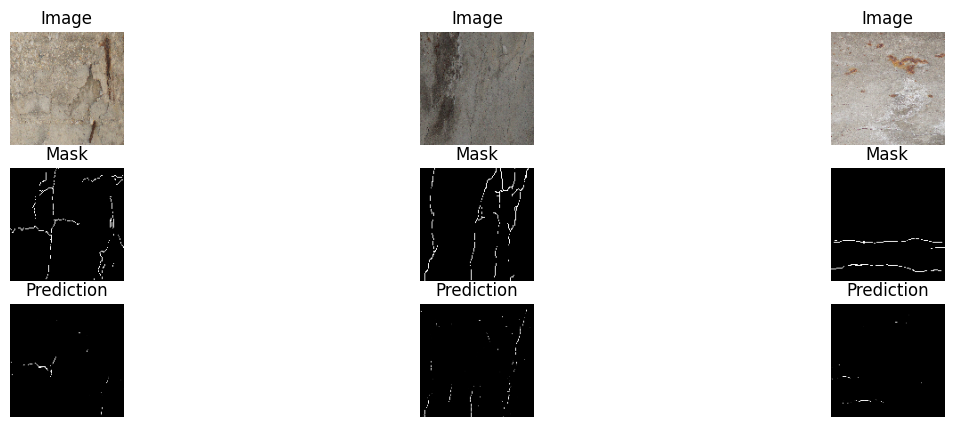

In [41]:


def visualize_predictions(model, images, masks, num_samples=3):
    predictions = model.predict(images)
 
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(3, num_samples, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title('Image')
        
        plt.subplot(3, num_samples, num_samples + i + 1)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title('Mask')
        
        plt.subplot(3, num_samples, 2 * num_samples + i + 1)
        plt.imshow(predictions[i], cmap='gray')
        plt.axis('off')
        plt.title('Prediction')
    
    plt.show()

# Visualize some predictions
visualize_predictions(model, x_test[:5], y_test[:5])

### Visualize training results



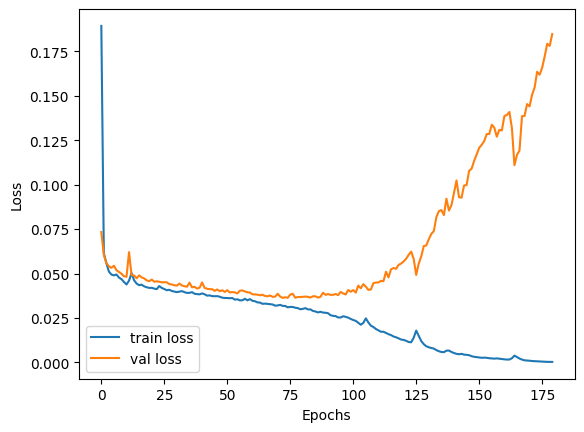

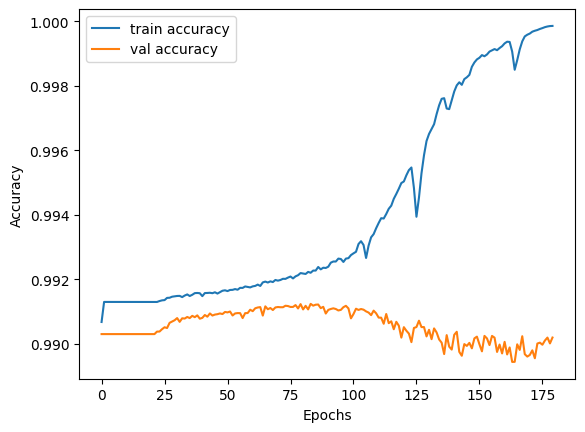

In [64]:
# Visualize training results
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Saving the model as .h5 file
This file can be load any where to use the model , for example with Flask we can make api for web and mobile apps

In [42]:
model.save("Crack-segmentation.h5")

In [60]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(128, 128)):
    # Load image
    img = load_img(image_path, target_size=target_size)
    # Convert to array
    img_array = img_to_array(img)
    # Normalize
    img_array = img_array.astype('float32') / 255.0
    # Expand dimensions to match the input shape for the model
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Example usage
custom_image_path = 'data\images\strymonas_0000009_1500_844.png'
preprocessed_image = preprocess_image(custom_image_path)


In [61]:
# Make predictions
predictions = model.predict(preprocessed_image)

# Squeeze the prediction to remove the batch dimension
predicted_mask = predictions.squeeze()


1/1 [==============================] - 0s 42ms/step


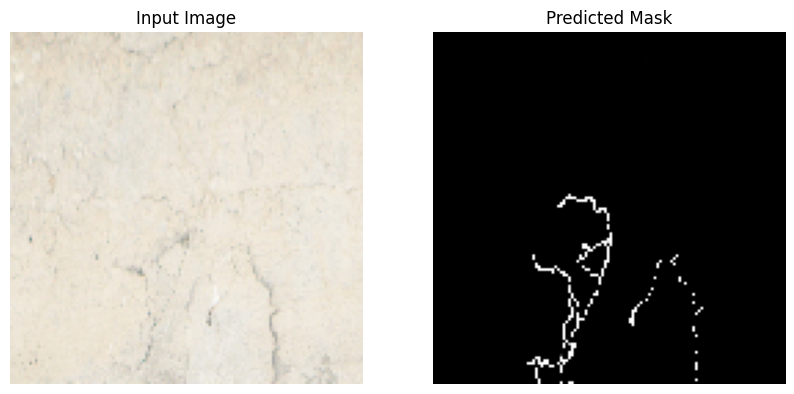

In [62]:

def visualize_prediction(image, predicted_mask):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image.squeeze())
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_mask,cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()

# Visualize the prediction
visualize_prediction(preprocessed_image, predicted_mask)


## Calculation of F1 Score

In [63]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_f1_score(y_true, y_pred, threshold=0.5):
    """
    Calculate F1 score for binary segmentation masks.

    Parameters:
    - y_true: True binary masks (numpy array).
    - y_pred: Predicted masks (numpy array).
    - threshold: Threshold to convert probabilities to binary masks.

    Returns:
    - f1: F1 score.
    - precision: Precision score.
    - recall: Recall score.
    """
    # Convert predictions to binary masks using threshold
    y_pred_binary = (y_pred > threshold).astype(np.uint8)

    # Flatten the masks for calculation
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred_binary.flatten()

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true_flat, y_pred_flat, zero_division=1)
    recall = recall_score(y_true_flat, y_pred_flat, zero_division=1)
    f1 = f1_score(y_true_flat, y_pred_flat, zero_division=1)

    return f1, precision, recall

# Predict masks for the validation images
predicted_masks = model.predict(x_test)

# Calculate F1 score for each image in the batch
f1_scores = []
for true_mask, pred_mask in zip(y_test, predicted_masks):
    # Ensure masks are numpy arrays
    true_mask_np = np.array(true_mask)
    pred_mask_np = np.array(pred_mask)

    # Flatten masks
    true_mask_np = true_mask_np.squeeze()
    pred_mask_np = pred_mask_np.squeeze()

    # Calculate metrics
    f1, precision, recall = calculate_f1_score(true_mask_np, pred_mask_np)
    f1_scores.append(f1)
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Average F1 score
average_f1_score = np.mean(f1_scores)
print(f'Average F1 Score: {average_f1_score:.4f}')


2/2 [==============================] - 0s 130ms/step
Precision: 0.4364, Recall: 0.0659, F1 Score: 0.1146
Precision: 0.5495, Recall: 0.1260, F1 Score: 0.2050
Precision: 0.7143, Recall: 0.0844, F1 Score: 0.1509
Precision: 0.5833, Recall: 0.4753, F1 Score: 0.5238
Precision: 0.7556, Recall: 0.3269, F1 Score: 0.4564
Precision: 0.3421, Recall: 0.1092, F1 Score: 0.1656
Precision: 0.7976, Recall: 0.2991, F1 Score: 0.4351
Precision: 0.0000, Recall: 0.0000, F1 Score: 1.0000
Precision: 0.5330, Recall: 0.4939, F1 Score: 0.5127
Precision: 0.1875, Recall: 0.0261, F1 Score: 0.0458
Precision: 0.4118, Recall: 0.2258, F1 Score: 0.2917
Precision: 0.4250, Recall: 0.1429, F1 Score: 0.2138
Precision: 0.0000, Recall: 0.0000, F1 Score: 1.0000
Precision: 0.1562, Recall: 0.0543, F1 Score: 0.0806
Precision: 0.4878, Recall: 0.0823, F1 Score: 0.1408
Precision: 0.2000, Recall: 0.2394, F1 Score: 0.2179
Precision: 0.2182, Recall: 0.0686, F1 Score: 0.1043
Precision: 0.4941, Recall: 0.2877, F1 Score: 0.3636
Precision: 

## Accuracy and F1 Score


In [72]:
# Average F1 score

print('Accuray of Model -->',history.history['accuracy'][-1]*100)
average_f1_score = np.mean(f1_scores)

print(f'Average F1 Score--> {average_f1_score:.4f}')

Accuray of Model --> 99.9852180480957
Average F1 Score--> 0.3534


## Gradio InterFace 
Upload an image below to get the segmented output from the trained model. Simply run the following cell and interact with the interface.

In [2]:
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf

# Load your our trained Model
model = load_model('Crack-segmentation.h5')


def preprocess_image(image, target_size=(128, 128)):
    # Convert the PIL image to a NumPy array
    img_array = np.array(image)
    # Resize the image using OpenCV
    img_resized = cv2.resize(img_array, target_size)
    # Normalize the image
    img_resized = img_resized.astype('float32') / 255.0
    # Expand dimensions to match the input shape for the model
    img_resized = np.expand_dims(img_resized, axis=0)
    return img_resized

def predict_mask(image):
    preprocessed_image = preprocess_image(image)
    # Make predictions
    predictions = model.predict(preprocessed_image)
    # Squeeze the prediction to remove the batch dimension
    predicted_mask = predictions.squeeze()
    # Normalize the mask to [0, 255] and convert to uint8
    predicted_mask = (predicted_mask * 255).astype(np.uint8)
    return predicted_mask

# Define the Gradio interface
iface = gr.Interface(
    fn=predict_mask,
    inputs=gr.Image(),
    outputs=gr.Image(type="numpy",label='Segmented Image 🚀'),
    title="Crack Segmentation",
    description="Upload an Image 📥"
)

# Launch the Gradio interface
iface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.12.0, however version 4.29.0 is available, please upgrade.
--------
1/1 [==============================] - 0s 32ms/step


## End